In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 

In [13]:
df = pd.read_csv('CSV2.csv') # reads the csv and creates the dataframe called movie
df.head(n=2)
# pd.read_csv('file.csv')

,id,age,birthdate,sex,salary,size,breakfast,lunch,dinner,late,...,shabu,grill,steak,fastfood,cake,dessert,coffee,juice,created_at,user_id
0,1,21,1996-07-19,male,"น้อยกว่า 10,000",fit,f,t,t,f,...,f,f,t,t,t,t,f,t,2018-02-12 10:15:15.007524+00,4
1,2,20,1998-02-13,female,"น้อยกว่า 10,000",thin,f,t,t,t,...,f,f,f,t,t,f,f,f,2018-02-18 04:35:55.301258+00,23


In [14]:
df2=df.drop(['id','birthdate','created_at','user_id'],1)
sex = {'male':0,'female':1}
size={'thin':0,'fit':1,'chubby':2,'fat':3}
salary={'น้อยกว่า 10,000':0,'10,000-19,999':1,'20,000-29,999':2,'30,000-39,999':3,'40,000-49,999':4,'50,000 ขึ้นไป':5}
breakfast = {'f':0,'t':1}
lunch = {'f':0,'t':1}
dinner = {'f':0,'t':1}
late = {'f':0,'t':1}
taste = {'f':0,'t':1}
price = {'f':0,'t':1}
service = {'f':0,'t':1}
clean = {'f':0,'t':1}
at = {'f':0,'t':1}
location = {'f':0,'t':1}
facebook = {'f':0,'t':1}
twitter = {'f':0,'t':1}
instagram = {'f':0,'t':1}
line = {'f':0,'t':1}
japanese = {'f':0,'t':1}
thai = {'f':0,'t':1}
diet = {'f':0,'t':1}
shabu = {'f':0,'t':1}
grill = {'f':0,'t':1}
steak = {'f':0,'t':1}
fastfood = {'f':0,'t':1}
cake = {'f':0,'t':1}
dessert = {'f':0,'t':1}
coffee = {'f':0,'t':1}
juice = {'f':0,'t':1}

for k,i in df2.iterrows():
    if i['sex']==i['sex']:
        df2.loc[k,"sexc"]=sex[i['sex']]
    if i['size']==i['size']:
        df2.loc[k,"sizec"]=size[i['size']]
    if i['salary']==i['salary']:
        df2.loc[k,"salaryc"]=salary[i['salary']]
    if i['breakfast']==i['breakfast']:
        df2.loc[k,"breakfastc"]=breakfast[i['breakfast']]
    if i['lunch']==i['lunch']:
        df2.loc[k,"lunchc"]=lunch[i['lunch']]
    if i['dinner']==i['dinner']:
        df2.loc[k,"dinnerc"]=breakfast[i['dinner']]
    if i['late']==i['late']:
        df2.loc[k,"latec"]=late[i['late']]
    if i['taste']==i['taste']:
        df2.loc[k,"tastec"]=taste[i['taste']]
    if i['price']==i['price']:
        df2.loc[k,"pricec"]=price[i['price']]
    if i['service']==i['service']:
        df2.loc[k,"servicec"]=service[i['service']]
    if i['clean']==i['clean']:
        df2.loc[k,"cleanc"]=clean[i['clean']]
    if i['at']==i['at']:
        df2.loc[k,"atc"]=at[i['at']]
    if i['location']==i['location']:
        df2.loc[k,"locationc"]=location[i['location']]
    if i['facebook']==i['facebook']:
        df2.loc[k,"facebookc"]=facebook[i['facebook']]
    if i['twitter']==i['twitter']:
        df2.loc[k,"twitterc"]=twitter[i['twitter']]
    if i['instagram']==i['instagram']:
        df2.loc[k,"instagramc"]=instagram[i['instagram']]
    if i['line']==i['line']:
        df2.loc[k,"linec"]=line[i['line']]
    if i['japanese']==i['japanese']:
        df2.loc[k,"japanesec"]=japanese[i['japanese']]
    if i['thai']==i['thai']:
        df2.loc[k,"thaic"]=thai[i['thai']]
    if i['diet']==i['diet']:
        df2.loc[k,"dietc"]=diet[i['diet']]
    if i['shabu']==i['shabu']:
        df2.loc[k,"shabuc"]=shabu[i['shabu']]
    if i['grill']==i['grill']:
        df2.loc[k,"grillc"]=grill[i['grill']]
    if i['steak']==i['steak']:
        df2.loc[k,"steakc"]=steak[i['steak']]
    if i['fastfood']==i['fastfood']:
        df2.loc[k,"fastfoodc"]=fastfood[i['fastfood']]
    if i['cake']==i['cake']:
        df2.loc[k,"cakec"]=grill[i['cake']]
    if i['dessert']==i['dessert']:
        df2.loc[k,"dessertc"]=dessert[i['dessert']]
    if i['coffee']==i['coffee']:
        df2.loc[k,"coffeec"]=coffee[i['coffee']]
    if i['juice']==i['juice']:
        df2.loc[k,"juicec"]=juice[i['juice']]

In [15]:
df2=df2.drop(['sex','size','salary'
            ,'breakfast','lunch','dinner','late','taste','price','service','clean',
            'at','location','facebook','twitter','instagram','line','japanese','thai','diet','shabu','grill',
            'steak','fastfood','cake','dessert','coffee','juice'],1)
df2.head()

,age,sexc,sizec,salaryc,breakfastc,lunchc,dinnerc,latec,tastec,pricec,...,thaic,dietc,shabuc,grillc,steakc,fastfoodc,cakec,dessertc,coffeec,juicec
0,21,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,20,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,22,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,19,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,18,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


In [16]:
f1 = df2['salaryc'].values
f2 = df2['age'].values
f3 = df2['sexc'].values
f4 = df2['salaryc'].values
f5 = df2['breakfastc'].values
f6 = df2['lunchc'].values
f7 = df2['dinnerc'].values
f8 = df2['shabuc'].values
f9 = df2['grillc'].values
f10 = df2['steakc'].values
f11 = df2['fastfoodc'].values
f12 = df2['cakec'].values
f13 = df2['dessertc'].values
f14 = df2['coffeec'].values
f15 = df2['juicec'].values
# X = np.array(list(zip(f4,f5)))
X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [17]:
X_std

array([[-0.34491316,  0.12355154, -2.11147658, ...,  0.91927712,
        -0.55677644,  1.07123339],
       [-0.34491316, -0.04330673,  0.47360222, ..., -1.08781126,
        -0.55677644, -0.93350339],
       [-0.34491316,  0.29040981,  0.47360222, ...,  0.91927712,
        -0.55677644,  1.07123339],
       ...,
       [-0.34491316,  0.12355154,  0.47360222, ..., -1.08781126,
        -0.55677644,  1.07123339],
       [-0.34491316,  0.12355154,  0.47360222, ...,  0.91927712,
        -0.55677644,  1.07123339],
       [ 1.11262311, -0.37702326,  0.47360222, ...,  0.91927712,
        -0.55677644, -0.93350339]])

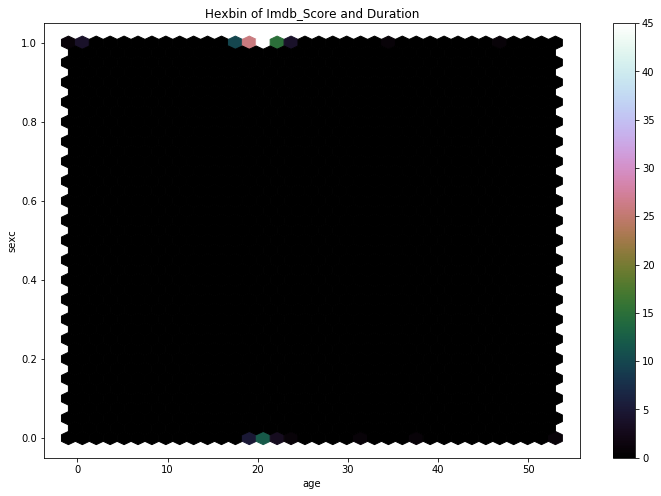

In [18]:
df2.plot(y= 'sexc', x ='age',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Duration',figsize=(12,8))


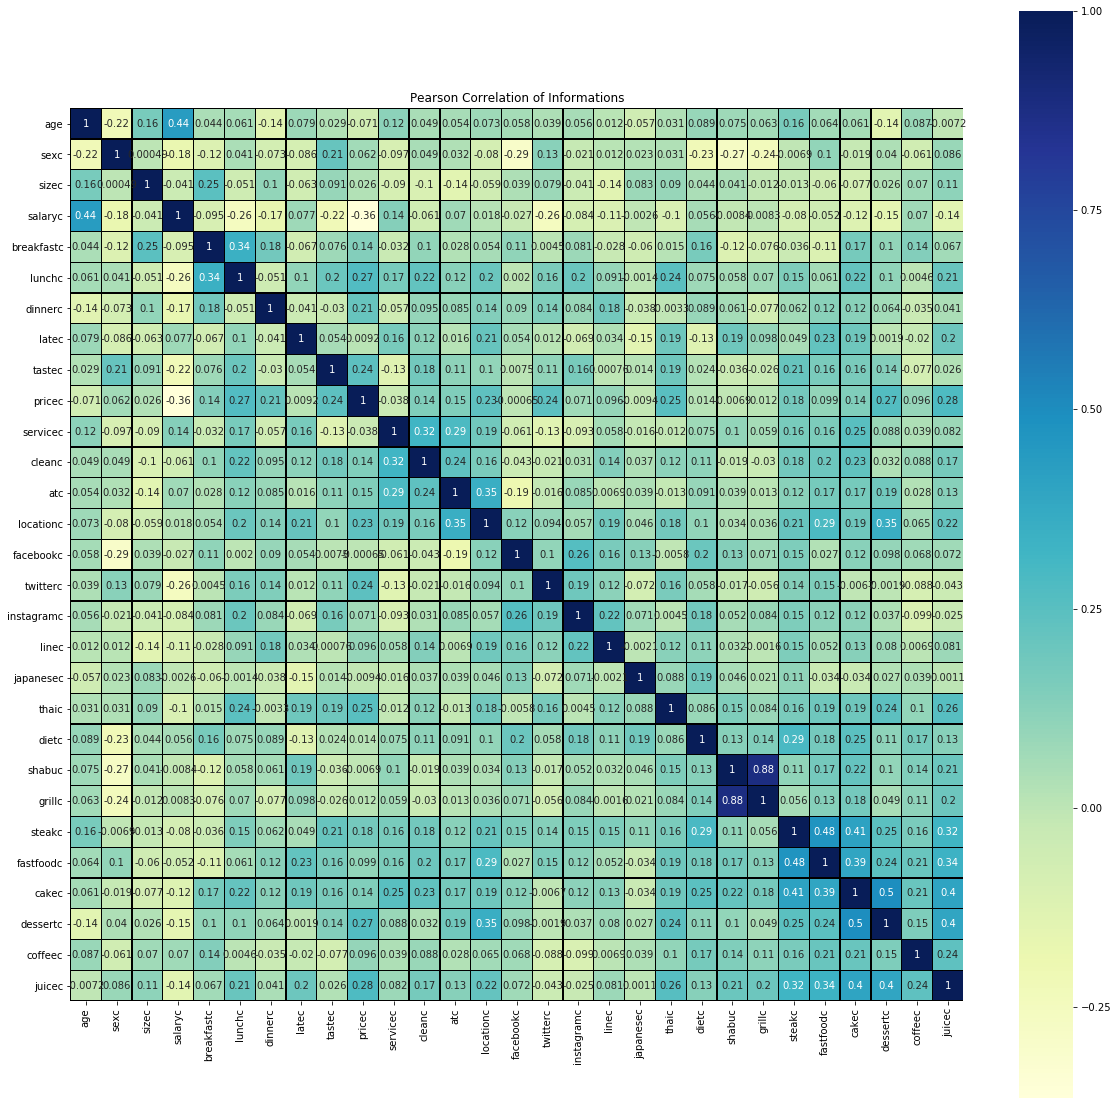

In [19]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
plt.title('Pearson Correlation of Informations')
# Draw the heatmap using seaborn
sns.heatmap(df2.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [20]:
f1 = df2['salaryc'].values
f2 = df2['age'].values
f3 = df2['sexc'].values
f4 = df2['salaryc'].values
f5 = df2['breakfastc'].values
f6 = df2['lunchc'].values
f7 = df2['dinnerc'].values
f8 = df2['shabuc'].values
f9 = df2['grillc'].values
f10 = df2['steakc'].values
f11 = df2['fastfoodc'].values
f12 = df2['cakec'].values
f13 = df2['dessertc'].values
f14 = df2['coffeec'].values
f15 = df2['juicec'].values
X = np.array(list(zip(f2,f1)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


NameError: name 'DBSCAN' is not defined

In [ ]:
f1 = df2['salaryc'].values
f2 = df2['age'].values
f3 = df2['sexc'].values
f4 = df2['salaryc'].values
f5 = df2['breakfastc'].values
f6 = df2['lunchc'].values
f7 = df2['dinnerc'].values
f8 = df2['shabuc'].values
f9 = df2['grillc'].values
f10 = df2['steakc'].values
f11 = df2['fastfoodc'].values
f12 = df2['cakec'].values
f13 = df2['dessertc'].values
f14 = df2['coffeec'].values
f15 = df2['juicec'].values
X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# print(labels)


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
n_clusters_

In [ ]:
# X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,random_state=0)
# print(X)
# print("labels_true",labels_true)

In [ ]:
df = pd.read_csv('session_csv.csv') # reads the csv and creates the dataframe called movie
df.head(n=2)

In [ ]:
df.plot.hist(alpha=0.5)

In [ ]:
df_time = pd.to_datetime(df["created_at"])

df_time = (df_time.dt.hour*60+df_time.dt.minute)*60 + df_time.dt.second


In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

f14 = df['id'].values
# f15 = df2['juicec'].values
X = np.array(list(zip(f14,df_time)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Session


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('session_csv.csv') # reads the csv and creates the dataframe called movie
df.head(n=2)
df2=df.drop(['id','user_id','value'],1)
action = {'enter':0,'enter_store':1,'เพิ่มเข้าตะกร้า':2,'สั่งอาหาร':3,'search_cate':4,
          'search_input':5,'กรอกประวัติความหิว':6,'like':7,'ใช้โค้ด':8,'click recommended menu':9,'click_genetic_rec':10,'click recommended menues':11}


for k,i in df2.iterrows():
    if i['action']==i['action']:
        df2.loc[k,"actionc"]=action[i['action']]
   

In [3]:
df.head()

,id,action,value,created_at,user_id
0,1144,enter,home,2018-02-21 08:30:45.169158+00,52
1,1148,enter,home,2018-02-21 10:07:01.98235+00,52
2,1152,เพิ่มเข้าตะกร้า,แกงส้ม+ไข่เจียว,2018-02-21 10:10:14.041527+00,52
3,1160,สั่งอาหาร,76,2018-02-21 10:15:29.73492+00,52
4,411,enter,home,2018-02-16 10:25:31.747361+00,18


In [45]:
df['created_at'] = pd.to_datetime(df["created_at"])

df2['created_atc']=df['created_at'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')

In [4]:
df2.head()

,action,created_at,actionc,created_atc
0,enter,2018-02-21 08:30:45.169158+00,0.0,2018-02-21 15:30:45.169158+07:00
1,enter,2018-02-21 10:07:01.98235+00,0.0,2018-02-21 17:07:01.982350+07:00
2,เพิ่มเข้าตะกร้า,2018-02-21 10:10:14.041527+00,2.0,2018-02-21 17:10:14.041527+07:00
3,สั่งอาหาร,2018-02-21 10:15:29.73492+00,3.0,2018-02-21 17:15:29.734920+07:00
4,enter,2018-02-16 10:25:31.747361+00,0.0,2018-02-16 17:25:31.747361+07:00


In [5]:
df_time = pd.to_datetime(df2["created_atc"])
day  = df_time.dt.day
date = df_time.dt.date
hour = df_time.dt.hour
df2['hourc'] = hour

In [46]:
df2.head()

,action,created_at,actionc,created_atc
0,enter,2018-02-21 08:30:45.169158+00,0.0,2018-02-21 15:30:45.169158+07:00
1,enter,2018-02-21 10:07:01.98235+00,0.0,2018-02-21 17:07:01.982350+07:00
2,เพิ่มเข้าตะกร้า,2018-02-21 10:10:14.041527+00,2.0,2018-02-21 17:10:14.041527+07:00
3,สั่งอาหาร,2018-02-21 10:15:29.73492+00,3.0,2018-02-21 17:15:29.734920+07:00
4,enter,2018-02-16 10:25:31.747361+00,0.0,2018-02-16 17:25:31.747361+07:00


In [7]:
f1 = df2['actionc'].values
f2 = df2['hourc'].values
X = np.array(list(zip(f2,f1)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(X)
#
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


62
Estimated number of clusters: 62


MemoryError: 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
# ts = pd.Series(df2['actionc'].values, index=pd.date_range(date, periods=1000))
# ts = ts.cumsum()
# ts.plot()

In [ ]:
# df = df.sort_values('date', ascending=True)
plt.plot( date,df2['actionc'],)
plt.xticks(rotation='vertical')

In [ ]:
df2.plot.bar(stacked=True);

In [ ]:
import matplotlib.pyplot as plt
# ax = df[['actionc']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
# ax.set_xlabel("Hour", fontsize=12)
# ax.set_ylabel("V", fontsize=12)
# plt.show()
# df2.plot(x="actionc", y="created_at", kind="bar")
df_group = df = pd.crosstab(date[10:], df2['actionc']) 

df_group.plot.bar(figsize=(20,30))

In [ ]:
# df = pd.read_csv('session_csv.csv') # reads the csv and creates the dataframe called movie
# df.head(n=2)
# df2=df2.drop(['id','user_id','value'],1)
action = {'enter':0,'enter_store':1,'เพิ่มเข้าตะกร้า':2,'สั่งอาหาร':3,'search_cate':4,
          'search_input':5,'กรอกประวัติความหิว':6,'like':7,'ใช้โค้ด':8,'click recommended menu':9,'click_genetic_rec':10,'click recommended menues':11}

for k,i in df2.iterrows():
    if i['action']==i['action']:
        df2.loc[k,"actionc"]=action[i['action']]
   

In [ ]:
df2.head()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
f1 = df2['actionc'].values
f2 = df2['hourc'].values
X = np.array(list(zip(f2,f1)))
# X = np.array(list(zip(f2,f3)))
hpc = PCA(n_components=2).fit_transform(X)
k_means = KMeans()
k_means.fit(hpc)

x_min, x_max = hpc[:, 0].min() - 5, hpc[:, 0].max() - 1
y_min, y_max = hpc[:, 1].min(), hpc[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

plt.plot(hpc[:, 0], hpc[:, 1], 'k.', markersize=4)
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:

# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(X)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(X[:,0],X[:,1], c= label_color, alpha=0.5) 
plt.show()

In [ ]:
df.head()
df2.head()

In [ ]:
# df2.set_index("hourc",drop=True,inplace=True)
# df2.plot.bar()
# plt.show()

In [ ]:
df2["hourc"].value_counts().plot(kind = "bar")
# df2.plot.bar(x='hourc')
# plt.show()

In [ ]:
df3_drop2=df2.drop(['action','created_at','created_atc'],1)

In [ ]:
df3_drop2.head()

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))
plt.title('Pearson Correlation of Informations')
# Draw the heatmap using seaborn
sns.heatmap(df3_drop2.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [ ]:
df3_drop2["hourc"].value_counts().plot(kind = "bar")


In [ ]:
df3_drop2["actionc"].value_counts().plot(kind = "bar")


In [ ]:
activity_duration = df3_drop2.groupby('hourc')['actionc'].sum()

In [ ]:
activity_duration

In [ ]:
test=pd.DataFrame(activity_duration)
check=test.reset_index(inplace=True)
# check
test

In [ ]:
test['actionc']

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
test.boxplot(column="hourc",by="actionc")

In [ ]:
# test.hist(column="hourc",by="actionc",bins=30)
test.plot.hist(alpha=1)

In [ ]:
# df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
# df = df.cumsum()

test.plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

plt.show()

In [ ]:
# plt.figure(figsize = (20,20))

test.plot(style='.-', markevery=5,figsize = (10,7))
plt.xlabel('hour (s)', fontsize=18)
plt.ylabel('amount of session' ,fontsize=18)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [43]:
df

,id,name,email,phone_number,address,picture,created_at,user_id
0,65,cher,surattana.sst@gmail.com,None,None,profilePicture/default_NujYRnn.jpg,2018-02-23 16:47:48.330135+00,67
1,41,Fah,fahsapin@hotmail.com,None,None,profilePicture/FahPanchakunathorn_social.jpg,2018-02-20 10:56:27.425017+00,43
2,27,จ๋า,octoberror@gmail.com,None,None,profilePicture/99daa35c18d14695_social.jpg,2018-02-19 10:19:34.835001+00,29
3,39,Weepawee,paweeuacharoensri@gmail.com,None,None,profilePicture/default_a7BzQwz.jpg,2018-02-20 09:08:18.222371+00,41
4,28,Dew'e,dominic_19462@hotmail.com,None,None,profilePicture/DeweDew_social.jpg,2018-02-19 11:01:38.390812+00,30
5,5,Thanupol,osan.shiori@windowslive.com,None,None,profilePicture/ThanupolCherdvorapong_social_L7...,2018-02-06 13:42:52.045278+00,6
6,29,Pumpim,NaN,None,None,profilePicture/PumpimParichat_social.jpg,2018-02-19 11:10:37.648574+00,31
7,57,Ramita,gedfah@gmail.com,None,None,profilePicture/avatar_efXcGzW.jpgsz50,2018-02-22 07:57:48.454371+00,59
8,30,Bammy,bam_nilove@hotmail.com,None,None,profilePicture/BammyUssariya_social.jpg,2018-02-19 14:41:28.739299+00,32
9,14,Toey,NaN,None,None,profilePicture/ToeyJittimongkon_social.jpg,2018-02-10 16:01:48.265212+00,17


In [83]:
df2.groupby('สั่งอาหาร').count()

KeyError: 'สั่งอาหาร'

In [85]:
x = df.groupby('action').count()


         id     action value                 created_at  user_id
3      1160  สั่งอาหาร    76 2018-02-21 10:15:29.734920       52
7       414  สั่งอาหาร    47 2018-02-16 10:27:35.459889       18
12      419  สั่งอาหาร    48 2018-02-16 10:34:29.828512       18
69      555  สั่งอาหาร    57 2018-02-17 10:25:10.492441       17
74      489  สั่งอาหาร    50 2018-02-16 15:46:14.582980       18
83      566  สั่งอาหาร    59 2018-02-17 10:42:57.362691       21
111     588  สั่งอาหาร    60 2018-02-18 12:07:17.467943       26
303     941  สั่งอาหาร    74 2018-02-20 14:16:10.418375       46
364    1179  สั่งอาหาร    77 2018-02-21 12:32:18.803217       53
396    1216  สั่งอาหาร    78 2018-02-21 14:46:08.346778       56
411    1231  สั่งอาหาร    79 2018-02-21 14:50:40.544001       57
477    1330  สั่งอาหาร    82 2018-02-22 11:39:16.568993       63
537    1402  สั่งอาหาร    84 2018-02-23 12:13:13.577960       37
586    1461  สั่งอาหาร    85 2018-02-24 10:17:55.488751       71
645    1525  สั่งอาหาร   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = 
y =

plt.scatter(x, y)
plt.show()

In [49]:
df.groupby('action').count()


,id,value,created_at,user_id
action,,,,
click recommended menu,5,5,5,5
click recommended menues,1,1,1,1
click_genetic_rec,13,13,13,13
enter,2858,2858,2858,2858
enter_store,1803,1803,1803,1803
like,13,13,13,13
search_cate,471,471,471,471
search_input,41,17,41,41
กรอกประวัติความหิว,136,136,136,136


In [51]:
user_id = df.groupby('user_id').count()

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=['giraffes', 'orangutans', 'monkeys'],
            y=[20, 14, 23]
    )]

py.iplot(data, filename='basic-bar')

In [25]:

df3 = pd.read_csv('profile_csv.csv') # reads the csv and creates the dataframe called movie
df3.head()
# df2=df.drop(['id','user_id','value'],1)
# action = {'enter':0,'enter_store':1,'เพิ่มเข้าตะกร้า':2,'สั่งอาหาร':3,'search_cate':4,
#           'search_input':5,'กรอกประวัติความหิว':6,'like':7,'ใช้โค้ด':8,'click recommended menu':9,'click_genetic_rec':10,'click recommended menues':11}


# for k,i in df2.iterrows():
#     if i['action']==i['action']:
#         df2.loc[k,"actionc"]=action[i['action']]

,id,name,email,phone_number,address,picture,created_at,user_id
0,65,cher,surattana.sst@gmail.com,None,None,profilePicture/default_NujYRnn.jpg,2018-02-23 16:47:48.330135+00,67
1,41,Fah,fahsapin@hotmail.com,None,None,profilePicture/FahPanchakunathorn_social.jpg,2018-02-20 10:56:27.425017+00,43
2,27,จ๋า,octoberror@gmail.com,None,None,profilePicture/99daa35c18d14695_social.jpg,2018-02-19 10:19:34.835001+00,29
3,39,Weepawee,paweeuacharoensri@gmail.com,None,None,profilePicture/default_a7BzQwz.jpg,2018-02-20 09:08:18.222371+00,41
4,28,Dew'e,dominic_19462@hotmail.com,None,None,profilePicture/DeweDew_social.jpg,2018-02-19 11:01:38.390812+00,30


In [ ]:
list(my_dataframe.columns.values)

In [39]:
list_id=list(df3.user_id.values)

In [40]:
list_id.sort(key=int)

In [60]:
user_id

,id,action,value,created_at
user_id,,,,
17,22,22,22,22
18,93,93,93,93
19,17,17,17,17
20,4,4,4,4
21,5,5,5,5
22,3,3,3,3
23,37,37,37,37
25,1,1,1,1
26,13,13,13,13


In [68]:
new_list = df['user_id'].unique().tolist()
plot_list = []
j= 0

for i in user_id.id :
    dic={'user_id': 0 , 'count_session': 0}
    dic['user_id'] = new_list[j]
    dic['count_session'] = i
    plot_list.append(dic)
    j = j +1
    


In [122]:
test

,id,action,value,created_at,user_id
3,1160,สั่งอาหาร,76,2018-02-21 10:15:29.734920,52
7,414,สั่งอาหาร,47,2018-02-16 10:27:35.459889,18
12,419,สั่งอาหาร,48,2018-02-16 10:34:29.828512,18
69,555,สั่งอาหาร,57,2018-02-17 10:25:10.492441,17
74,489,สั่งอาหาร,50,2018-02-16 15:46:14.582980,18
83,566,สั่งอาหาร,59,2018-02-17 10:42:57.362691,21
111,588,สั่งอาหาร,60,2018-02-18 12:07:17.467943,26
303,941,สั่งอาหาร,74,2018-02-20 14:16:10.418375,46
364,1179,สั่งอาหาร,77,2018-02-21 12:32:18.803217,53
396,1216,สั่งอาหาร,78,2018-02-21 14:46:08.346778,56


In [120]:
test = df.loc[df['action'] == 'สั่งอาหาร']

t = test['user_id'].value_counts()
t

54     20
46     12
255    10
52      9
134     9
142     9
224     9
89      8
223     7
56      7
90      7
96      7
84      6
258     6
18      5
95      5
74      4
187     4
163     4
254     3
97      3
246     3
234     3
57      3
238     3
267     3
81      3
68      3
127     3
63      2
       ..
17      1
21      1
23      1
26      1
37      1
251     1
271     1
88      1
76      1
79      1
211     1
210     1
193     1
188     1
186     1
182     1
179     1
171     1
149     1
148     1
143     1
225     1
136     1
229     1
128     1
94      1
236     1
220     1
85      1
101     1
Name: user_id, Length: 74, dtype: int64

In [112]:
%matplotlib inline

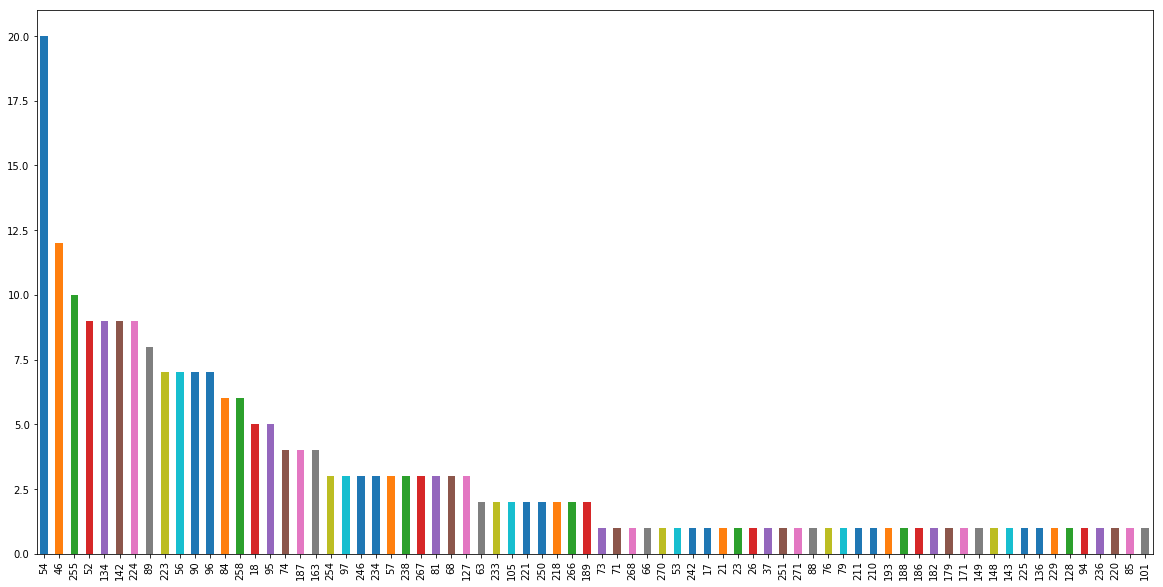

In [119]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


t.plot.bar()

In [123]:

df3 = pd.read_csv('order_csv.csv') # reads the csv and creates the dataframe called movie
df3.head()
# df2=df.drop(['id','user_id','value'],1)
# action = {'enter':0,'enter_store':1,'เพิ่มเข้าตะกร้า':2,'สั่งอาหาร':3,'search_cate':4,
#           'search_input':5,'กรอกประวัติความหิว':6,'like':7,'ใช้โค้ด':8,'click recommended menu':9,'click_genetic_rec':10,'click recommended menues':11}


# for k,i in df2.iterrows():
#     if i['action']==i['action']:
#         df2.loc[k,"actionc"]=action[i['action']]


,id,menu,amount,date,address,total,phone_number,slip_payment,delivery_charge,payment_method,coupon,created_at,store_id,user_id,morethings,status,isSuccess
0,181,{184},{1},2018-03-09 12:40:49.596791+00,หอ C10,55,"""0958171957""",NaN,10,จ่ายเงินปลายทาง,NaN,2018-03-09 12:40:49.597613+00,1,96,NaN,กำลังส่ง,t
1,193,"{199,242}","{1,1}",2018-03-11 12:24:20.207649+00,หอ C-6,75,"""0908390241""",NaN,10,จ่ายเงินปลายทาง,NaN,2018-03-11 12:24:20.208554+00,1,134,NaN,กำลังส่ง,t
2,173,"{""('345', '351', '356')""}",{1},2018-03-08 10:22:43.757011+00,หอ M0826639206,164,"""0826639206""",slip_payment/2018/03/08/28927819_7665739802003...,25,พร้อมเพย์,NaN,2018-03-08 10:22:43.758131+00,24,18,NaN,กำลังส่ง,t
3,48,{249},{4},2018-02-16 10:32:47+00,หอ C1,150,"""0826639206""",slip_payment/2018/02/16/IMG_20180214_231936247...,10,พร้อมเพย์,NaN,2018-02-16 10:32:47.663227+00,1,18,NaN,กำลังส่ง,t
4,47,{240},{2},2018-02-16 10:27:10+00,หอ C6,75,"""097-0788305""",slip_payment/2018/02/16/IMG_20180214_231936247...,5,พร้อมเพย์,NaN,2018-02-16 10:27:10.620342+00,1,18,NaN,กำลังส่ง,t


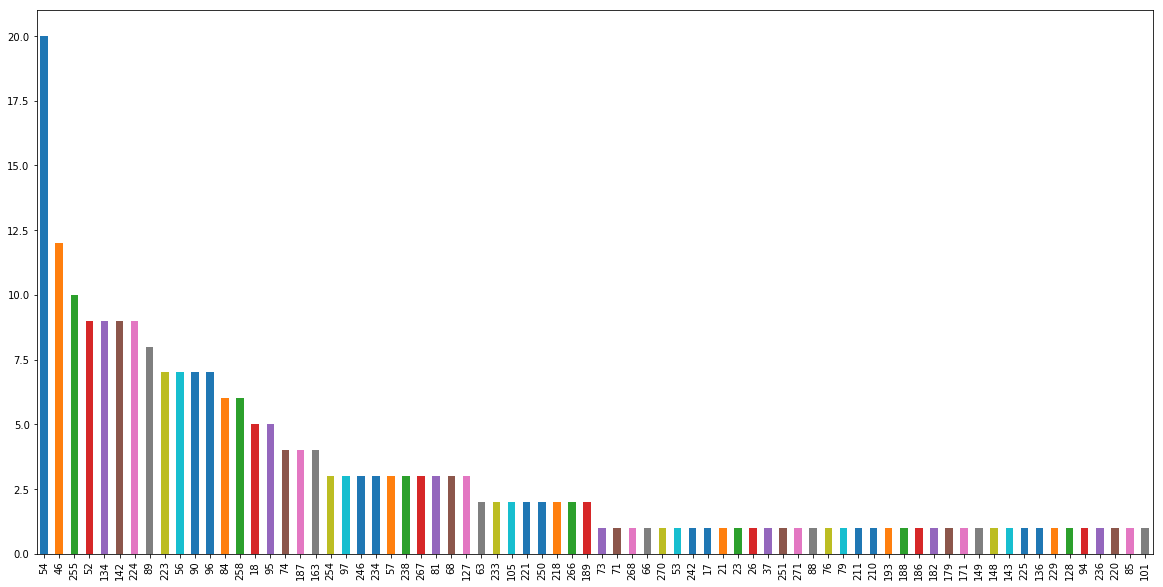

In [128]:
t = test['user_id'].value_counts()

t.plot.bar()

# Behavioral คือข้อมูลที่ได้จากการสังเกตพฤติกรรมของลูกค้าตามประวัติการสั่งซื้อ ประวัติการเลือกประเภทของร้านอาหารที่สนใจและเข้าชม ประวัติการใช้บริการร้านอาหาร และประวัติการค้นหา

## ร้านไหนคนเข้าเยอะสุด

In [159]:
df

,id,action,value,created_at,user_id
0,1144,enter,home,2018-02-21 08:30:45.169158+00,52
1,1148,enter,home,2018-02-21 10:07:01.98235+00,52
2,1152,เพิ่มเข้าตะกร้า,แกงส้ม+ไข่เจียว,2018-02-21 10:10:14.041527+00,52
3,1160,สั่งอาหาร,76,2018-02-21 10:15:29.73492+00,52
4,411,enter,home,2018-02-16 10:25:31.747361+00,18
5,412,enter,โรงอาหารโต้รุ่ง,2018-02-16 10:26:00.570519+00,18
6,413,enter_store,พินิจโต้รุ่ง,2018-02-16 10:26:29.273015+00,18
7,414,สั่งอาหาร,47,2018-02-16 10:27:35.459889+00,18
8,415,enter,home,2018-02-16 10:30:39.613407+00,18
9,416,enter,โรงอาหารโต้รุ่ง,2018-02-16 10:30:57.685493+00,18


In [15]:
enter_store = df.loc[df['action'] == 'enter_store']

In [31]:
# t = enter_store['value'].value_counts()
values = enter_store['value'].value_counts().keys().tolist()
counts = enter_store['value'].value_counts().tolist()

In [44]:
enter_store['value'].value_counts()

2,พินิจโต้รุ่ง                           111
SteakHolder                               94
พินิจโต้รุ่ง                              92
5,ร้าน 3 ป. ขาหมู อาหารตามสั่ง            87
ร้าน 3 ป. ขาหมู อาหารตามสั่ง              82
ตำยำย่าง อาหารอีสาน ลาบยโส                66
24,SteakHolder                            66
ANWAR BURGER                              64
ร้านอาหารตามสั่งอิ่มอร่อย                 64
3,ร้านอาหารตามสั่งอิ่มอร่อย               59
12,ตำยำย่าง อาหารอีสาน ลาบยโส             57
น้องแนนหมูปิ้ง                            55
25,Salad In The Box                       53
ปังเย็น                                   49
18,ANWAR BURGER                           48
14,เครื่องดื่ม ยำผลไม้ ผลไม้              45
15,ปังเย็น                                42
16,น้องแนนหมูปิ้ง                         41
เครื่องดื่ม ยำผลไม้ ผลไม                  41
สมใจ ลูกชิ้นทอด                           40
ผัดไท หอยทอด ลาดหน้า                      39
4,อาหารอิสลาม Halal Food                  39
อาหารอิสลา

In [135]:
from collections import defaultdict

dic = defaultdict(int)

for value,count in zip(values,counts) :
  

    if ',' in value :
        temp = value.split(',')

        if temp[1] in dic :
            dic[temp[1]] += count                 
        else :
            dic[temp[1]] = count
     
    else :
       
        if value in dic :
            dic[value] += count
        else :
            dic[value] = count

        

In [143]:
import operator
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1))
sorted_dic

[('26', 1),
 ('24', 1),
 ('21', 4),
 ('Steak Holder', 36),
 ('ผัดไท หอยทอด ลาดหน้า', 39),
 ('เครื่องดื่ม ยำผลไม้ ผลไม', 41),
 ('ผัดไท หอยทอด ราดหน้า', 42),
 ('ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี', 43),
 ('ข้าวแกงชุดอิ่มอร่อย', 47),
 ('แชมป์ฮั้งเพ้ง', 50),
 ('Salad In The Box', 53),
 ('ศิริรัตน์ โจ้ก ข้าวต้ม', 54),
 ('สมใจ ลูกชิ้นทอด', 55),
 ('ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ', 55),
 ('ชาย 4 บะหมี่เกี๊ยว', 62),
 ('เครื่องดื่ม ยำผลไม้ ผลไม้', 65),
 ('อาหารอิสลาม Halal Food', 78),
 ('ปังเย็น', 91),
 ('น้องแนนหมูปิ้ง', 96),
 ('ANWAR BURGER', 112),
 ('ร้านอาหารตามสั่งอิ่มอร่อย', 123),
 ('ตำยำย่าง อาหารอีสาน ลาบยโส', 123),
 ('SteakHolder', 160),
 ('ร้าน 3 ป. ขาหมู อาหารตามสั่ง', 169),
 ('พินิจโต้รุ่ง', 203)]

In [141]:
x = []
y = []
for value in sorted_dic:    # for name, age in list.items():  (for Python 3.x)
    x.append(value[0])
    y.append(value[1])


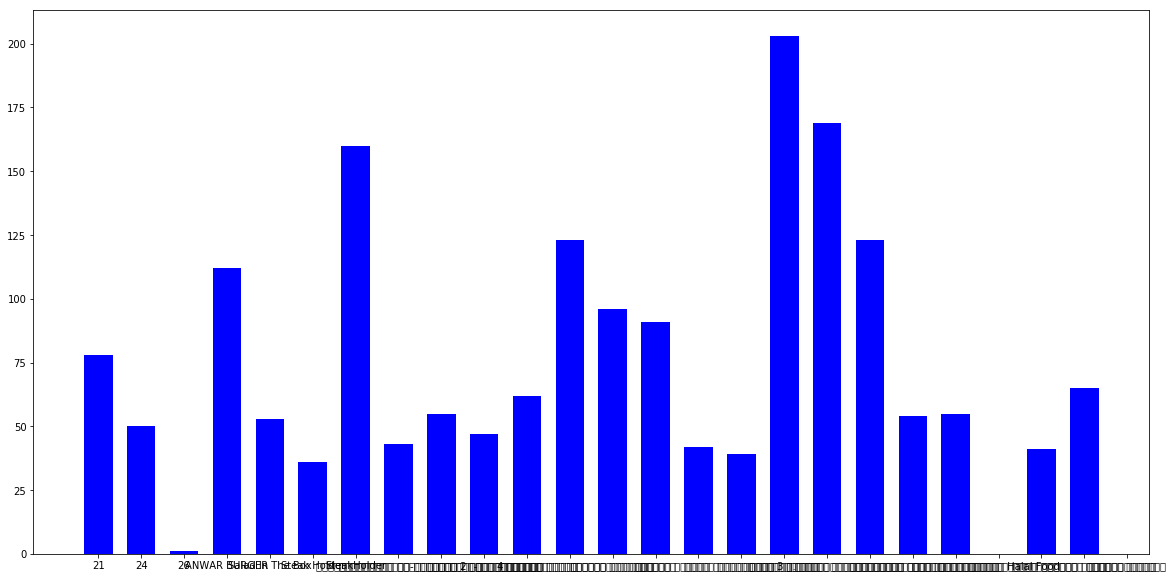

In [142]:

width = 1/1.5
plt.figure(figsize=(20,10))
plt.bar(x, y, width, color="blue")


fig = plt.gcf()

## เมนูที่สั่งมากที่สุด

In [149]:
add = df.loc[df['action'] == 'เพิ่มเข้าตะกร้า']

In [151]:
values = add['value'].value_counts().keys().tolist()
counts = add['value'].value_counts().tolist()

In [156]:
add['value'].value_counts()

ข้าวเหนียว                                            38
หมูปิ้ง                                               32
ข้าวราดผัดพริกแกงหมู,หมูกรอบ,แหนม,ไก่,ปลาเค็ม         25
ตับไก่                                                24
173,ขนมจีน                                            19
ตำไทย ตำปู ปู+ปลาร้า โคราช ตำแตง                      19
ปีกไก่                                                19
ไก่ย่าง                                               18
ข้าวราดผัดคะน้าทะเล,ปลาหมึก,กุ้ง,ปลา                  13
ข้าวกระเพราหมู,ไก่                                    12
195,แตงโม                                             12
ข้าวคะน้าหมูกรอบ                                      11
แตงโม                                                 10
344,ตำป่า ตำซั่ว ตำมั่ว ตำหมูยอ ตำไข่เค็ม ตำมะม่วง    10
133,ข้าวเหนียว                                        10
บะหมี่หมูกรอบ ธรรมดา                                  10
เบอร์เกอร์เนื้อ ไก่ ปลา กุ้ง                          10
ข้าวราดผัดพริกแกงทะเล,ปลาหมึก,ก

## ประเภทอาหารที่ถูกค้นหา

In [160]:
search = df.loc[df['action'] == 'search_cate']
values = add['value'].value_counts().keys().tolist()
counts = add['value'].value_counts().tolist()
search['value'].value_counts()

อาหารไทย        246
เครื่องดื่ม     106
delivery         28
ปิ้งย่าง         28
สเต็ก            20
all              17
อาหารเกาหลี       7
ของหวาน           6
ชาบู              5
อาหารญี่ปุ่น      5
about-ginim       3
Name: value, dtype: int64

In [161]:
search = df.loc[df['action'] == 'search_input']
search['value'].value_counts()

หมูปิ้ง                2
นายเกรียง              1
พินิจโต้รุ่ง           1
โรตี                   1
อินเตอร์เฮ้า           1
อินเตอเฮ้า             1
TR0002                 1
ค่าส่ง                 1
สเต็ก                  1
ก๋วยเตี๋ยวไก่ี๋ยว      1
ชาบู                   1
ปิ้งย่าง               1
กระเพราไข่เยี้ยวม้า    1
ผัดไท                  1
กาแฟ                   1
โต้รุ่ง                1
Name: value, dtype: int64

In [163]:
enter = df.loc[df['action'] == 'enter']
enter

,id,action,value,created_at,user_id
0,1144,enter,home,2018-02-21 08:30:45.169158+00,52
1,1148,enter,home,2018-02-21 10:07:01.98235+00,52
4,411,enter,home,2018-02-16 10:25:31.747361+00,18
5,412,enter,โรงอาหารโต้รุ่ง,2018-02-16 10:26:00.570519+00,18
8,415,enter,home,2018-02-16 10:30:39.613407+00,18
9,416,enter,โรงอาหารโต้รุ่ง,2018-02-16 10:30:57.685493+00,18
13,420,enter,home,2018-02-16 11:14:13.457351+00,18
20,754,enter,home,2018-02-20 01:42:46.404412+00,36
22,758,enter,โรงอาหารโต้รุ่ง,2018-02-20 01:45:55.755653+00,36
26,438,enter,home,2018-02-16 13:23:07.819235+00,19


In [164]:
df3 = pd.read_csv('order_csv.csv') 
df3['created_at'] = pd.to_datetime(df3["created_at"])
df3['created_atc']=df3['created_at'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')df3

,id,menu,amount,date,address,total,phone_number,slip_payment,delivery_charge,payment_method,coupon,created_at,store_id,user_id,morethings,status,isSuccess
0,181,{184},{1},2018-03-09 12:40:49.596791+00,หอ C10,55,"""0958171957""",NaN,10,จ่ายเงินปลายทาง,NaN,2018-03-09 12:40:49.597613+00,1,96,NaN,กำลังส่ง,t
1,193,"{199,242}","{1,1}",2018-03-11 12:24:20.207649+00,หอ C-6,75,"""0908390241""",NaN,10,จ่ายเงินปลายทาง,NaN,2018-03-11 12:24:20.208554+00,1,134,NaN,กำลังส่ง,t
2,173,"{""('345', '351', '356')""}",{1},2018-03-08 10:22:43.757011+00,หอ M0826639206,164,"""0826639206""",slip_payment/2018/03/08/28927819_7665739802003...,25,พร้อมเพย์,NaN,2018-03-08 10:22:43.758131+00,24,18,NaN,กำลังส่ง,t
3,48,{249},{4},2018-02-16 10:32:47+00,หอ C1,150,"""0826639206""",slip_payment/2018/02/16/IMG_20180214_231936247...,10,พร้อมเพย์,NaN,2018-02-16 10:32:47.663227+00,1,18,NaN,กำลังส่ง,t
4,47,{240},{2},2018-02-16 10:27:10+00,หอ C6,75,"""097-0788305""",slip_payment/2018/02/16/IMG_20180214_231936247...,5,พร้อมเพย์,NaN,2018-02-16 10:27:10.620342+00,1,18,NaN,กำลังส่ง,t
5,185,"{206,133,132,131}","{1,1,1,2}",2018-03-10 10:10:15.120528+00,หอ F6,62,"""0813043539""",NaN,7,จ่ายเงินปลายทาง,NaN,2018-03-10 10:10:15.121879+00,1,52,ไก่ย่างไม่เอาหนัง เอาเนื้อล้วน,กำลังส่ง,t
6,298,"{""('345', '354', '359')""}",{1},2018-03-27 05:38:48.991127+00,หอ E1,159,"""Noneadfa""",slip_payment/2018/03/27/person_8VOfTJ1.png,25,พร้อมเพย์,DC0001,2018-03-27 05:38:48.992842+00,24,1,NaN,รับออเดอร์,t
7,82,{261},{1},2018-02-22 11:34:58.804605+00,หอ F6,40,"""0913581933""",slip_payment/2018/02/22/IMG_6947.JPG,7,พร้อมเพย์,TR0001,2018-02-22 11:34:58.805138+00,1,63,NaN,กำลังส่ง,t
8,49,"{5,12,13}","{1,1,1}",2018-02-16 15:43:13+00,หอ B0,115,"""0888888888""",NaN,10,NaN,NaN,2018-02-16 15:43:13.658583+00,1,18,NaN,กำลังส่ง,t
9,303,{422},{1},2018-03-28 10:14:15.346851+00,หอ C1,55,"""0988269451""",NaN,10,จ่ายเงินปลายทาง,NaN,2018-03-28 10:14:15.349505+00,1,56,ข้าวขาหมูกระเพรา พิเศษ ไข่ดาว \n\nถ้ามีผล ขอแต...,กำลังส่ง,t


In [394]:
t = pd.to_datetime(df3["created_at"])
date=t.dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')

# date = df3['date'].value_counts().keys().tolist()
user = df3['user_id']


In [298]:

new_df = pd.DataFrame(columns = ['hour','minute','hourfloat','x','y','user_id'])
for i,j in zip(date,user) :
#     temp = i.split(' ')
#     temp2 = temp[1].split(':')

    
    
    hourfloat = (int(i.hour)+int(i.minute))/2.0
    x=np.sin(2.*np.pi*hourfloat/24.)
    y=np.cos(2.*np.pi*hourfloat/24.)

    new_df.loc[len(new_df)] = [int(i.hour), int(i.minute),hourfloat,x,y,j]

ValueError: cannot set a row with mismatched columns

In [291]:
new_df

,hour,minute,hourfloat,x,y,user_id
0,19.0,40.0,29.5,9.914449e-01,1.305262e-01,96.0
1,19.0,24.0,21.5,-6.087614e-01,7.933533e-01,134.0
2,17.0,22.0,19.5,-9.238795e-01,3.826834e-01,18.0
3,17.0,32.0,24.5,1.305262e-01,9.914449e-01,18.0
4,17.0,27.0,22.0,-5.000000e-01,8.660254e-01,18.0
5,17.0,10.0,13.5,-3.826834e-01,-9.238795e-01,52.0
6,12.0,38.0,25.0,2.588190e-01,9.659258e-01,1.0
7,18.0,34.0,26.0,5.000000e-01,8.660254e-01,63.0
8,22.0,43.0,32.5,7.933533e-01,-6.087614e-01,18.0
9,17.0,14.0,15.5,-7.933533e-01,-6.087614e-01,56.0


In [292]:
def kmeansshow(k,X):

    from sklearn import cluster
    from matplotlib import pyplot
    import numpy as np

    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    #print centroids

    for i in range(k):
        # select only data observations with cluster label == i
        ds = X[np.where(labels==i)]
        # plot the data observations
        pyplot.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
        # make the centroid x's bigger
        pyplot.setp(lines,ms=15.0)
        pyplot.setp(lines,mew=2.0)
    pyplot.show()
    return centroids

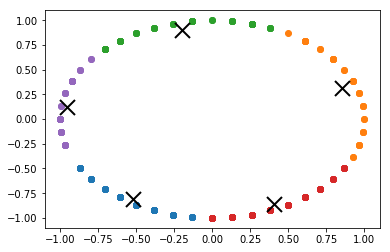

array([[-0.52150156, -0.80706197],
       [ 0.85186559,  0.31326254],
       [-0.19658939,  0.90017223],
       [ 0.40584024, -0.8551332 ],
       [-0.95416591,  0.11848119]])

In [293]:
kmeansshow(5,sort[['x', 'y']].values)

In [294]:
sort = new_df.sort_values('x')

5
Estimated number of clusters: 5
Silhouette Coefficient: 0.308


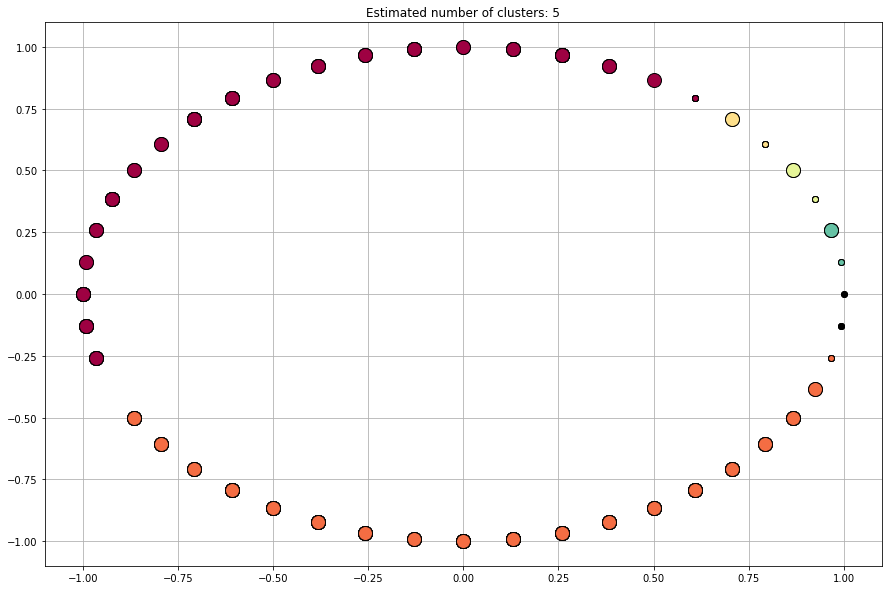

In [378]:
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(sort[['x', 'y']].values)
X = sort[['x', 'y']].values
db = DBSCAN(eps=0.2, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]


for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    
for xy in zip(sort['x'], sort['y']):                                       # <--
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--

plt.grid()
# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [388]:


for index, row in sort.iterrows():


    if row['x'] >= -1 and row['x'] <= 0.65 and row['y'] >= -0.25 and row['y'] <= 1 :
        sort.loc[index,"groups"]= 0
    
    #1 :orange
    elif row['x'] >= -0.85 and row['x'] <= 0.95 and row['y'] >= -1.00 and row['y'] <= -0.25 :
        sort.loc[index,"groups"]= 1
    
    #2 :yellow
    elif row['x'] >= 0.70 and row['x'] <= 0.80 and row['y'] >= 0.6 and row['y'] <= 0.75 :
        sort.loc[index,"groups"]= 2
    #3 :green
    elif row['x'] >= 0.80 and row['x'] <= 0.90 and row['y'] >= 0.35 and row['y'] <= 0.50 :
        sort.loc[index,"groups"]= 3
        print(3)
    #4 :blue
    elif row['x'] >= 0.90 and row['x'] <= 1.00 and row['y'] >= 0.15 and row['y'] <= 0.25 :
        sort.loc[index,"groups"]= 4
        print(4)


In [386]:
sort.to_csv('cluster_time2.csv', encoding='utf-8', index=False)

In [389]:
print('{}'.format(1.19434011948696E-15))

1.19434011948696e-15


In [373]:
xy

array([[ 9.91444861e-01, -1.30526192e-01],
       [ 9.91444861e-01, -1.30526192e-01],
       [ 9.91444861e-01, -1.30526192e-01],
       [ 1.00000000e+00,  1.19434012e-15],
       [ 1.00000000e+00,  1.19434012e-15]])

In [390]:
df4 = pd.read_csv('cluster_time.csv') 

In [398]:
sort = df4.sort_values('user_id')

In [400]:
sort.to_csv('cluster_time2.csv', encoding='utf-8', index=False)

In [403]:
df5 = pd.read_csv('cluster_time2.csv') 

5
Estimated number of clusters: 5
Silhouette Coefficient: 0.276


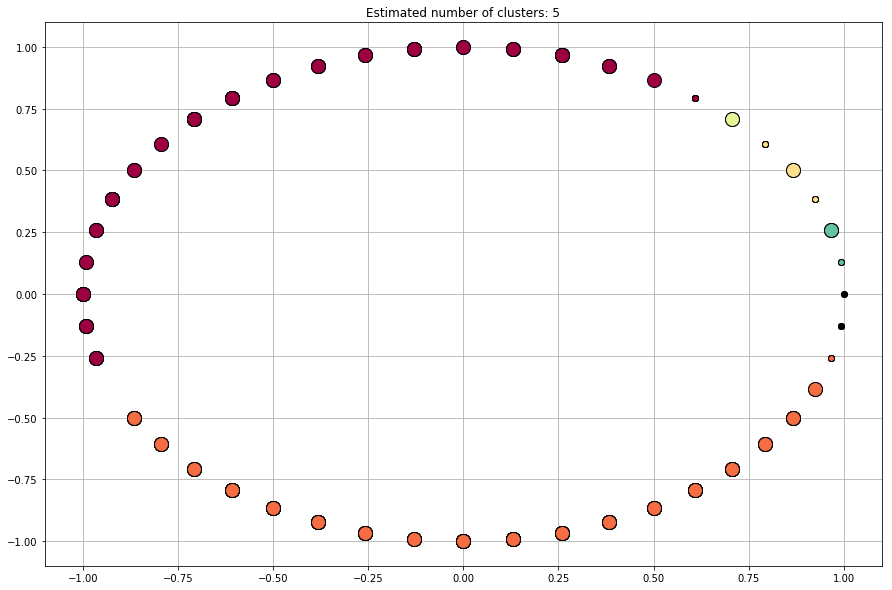

In [404]:
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(sort[['x', 'y']].values)
X = df5[['x', 'y']].values
db = DBSCAN(eps=0.2, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]


for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    
for xy in zip(sort['x'], sort['y']):                                       # <--
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--

plt.grid()
# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [415]:

for index, row in sort.iterrows():

    #0 :red 
    if row['x'] >= -1 and row['x'] <= 0.60 and row['y'] >= -0.25 and row['y'] <= 1 :
        df5.loc[index,"groups"]= 0
    
    #1 :orange
    elif row['x'] >= -0.85 and row['x'] <= 0.95 and row['y'] >= -1.00 and row['y'] <= -0.24 :
        df5.loc[index,"groups"]= 1
    
    #2 :green
    elif row['x'] >= 0.70 and row['x'] <= 0.75 and row['y'] >= 0.70 and row['y'] <= 0.74 :
        df5.loc[index,"groups"]= 2
        print(2)
    #3 :yellow
    elif row['x'] >= 0.75 and row['x'] <= 0.93 and row['y'] >= 0.35 and row['y'] <= 0.57 :
        df5.loc[index,"groups"]= 3
        print(3)
    #4 :blue
    elif row['x'] >= 0.96 and row['x'] <= 0.99 and row['y'] >= 0.15 and row['y'] <= 0.27 :
        df5.loc[index,"groups"]= 4
        print(4)


3
3
2
4
3
3
2
4
3
3
4


In [416]:
df5.to_csv('cluster_time2.csv', encoding='utf-8', index=False)

In [420]:
test = df5.loc[df5['groups'] == 0]
test['hour'].value_counts()

19    33
17    24
18    15
21    10
20    8 
16    4 
11    4 
12    2 
0     2 
23    1 
22    1 
10    1 
1     1 
Name: hour, dtype: int64

In [421]:
test = df5.loc[df5['groups'] == 1]
test['hour'].value_counts()

19    51
18    40
17    27
20    20
21    11
16    2 
Name: hour, dtype: int64

In [422]:
test = df5.loc[df5['groups'] == 2]
test['hour'].value_counts()

19    2
Name: hour, dtype: int64

In [423]:
test = df5.loc[df5['groups'] == 3]
test['hour'].value_counts()

20    4
19    1
18    1
Name: hour, dtype: int64

In [424]:
test = df5.loc[df5['groups'] == 4]
test['hour'].value_counts()

19    3
20    1
18    1
Name: hour, dtype: int64

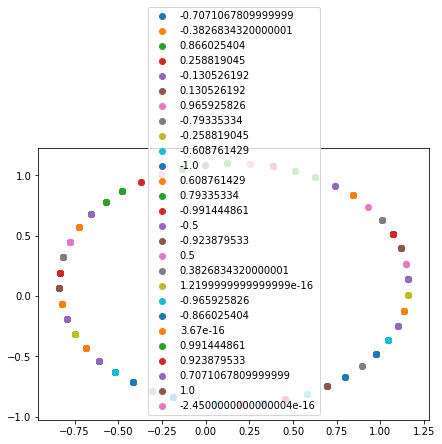

In [429]:
labels2 = df5['x'].unique().tolist()
X=df5[['x', 'y']].values
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)
dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['x'] = df5['x']
dfPCA

plt.figure(figsize=(7,5))
for lab in labels2:
#     print(lab)
    plt.scatter(dfPCA.loc[dfPCA['x'] == lab, 'x1'],  dfPCA.loc[dfPCA['x'] == lab, 'x2'], label=lab)
    plt.legend()

In [430]:
import numpy as np
from kmodes.kmodes import KModes

# random categorical data
data = np.random.choice(20, (100, 10))

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 26, cost: 788.0
Run 1, iteration: 2/100, moves: 3, cost: 788.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 21, cost: 794.0
Run 2, iteration: 2/100, moves: 8, cost: 791.0
Run 2, iteration: 3/100, moves: 0, cost: 791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 11, cost: 806.0
Run 3, iteration: 2/100, moves: 2, cost: 805.0
Run 3, iteration: 3/100, moves: 0, cost: 805.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 19, cost: 792.0
Run 4, iteration: 2/100, moves: 5, cost: 791.0
Run 4, iteration: 3/100, moves: 1, cost: 791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 16, cost: 799.0
Run 5, iteration: 2/100, moves:

In [33]:
df6 = pd.read_csv('order_cate_01.csv') 
df6.head()

,user_id,Salad In The Box,SteakHolder,ANWAR BURGER,สมใจ ลูกชิ้นทอด,น้องแนนหมูปิ้ง,ปังเย็น,เครื่องดื่ม ยำผลไม้ ผลไม้,ข้าวแกงชุดอิ่มอร่อย,ตำยำย่าง อาหารอีสาน ลาบยโส,ศิริรัตน์ โจ้ก ข้าวต้ม,ผัดไท หอยทอด ราดหน้า,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี,แชมป์ฮั้งเพ้ง,ชาย 4 บะหมี่เกี๊ยว,ร้าน 3 ป. ขาหมู อาหารตามสั่ง,อาหารอิสลาม Halal Food,ร้านอาหารตามสั่งอิ่มอร่อย,พินิจโต้รุ่ง
0,96,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,134,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,1
2,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,286,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0
4,52,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0


In [58]:
df7 = pd.read_csv('order_cate_count2.csv') 
df7

,user_id,Salad In The Box,SteakHolder,ANWAR BURGER,สมใจ ลูกชิ้นทอด,น้องแนนหมูปิ้ง,ปังเย็น,เครื่องดื่ม ยำผลไม้ ผลไม้,ข้าวแกงชุดอิ่มอร่อย,ตำยำย่าง อาหารอีสาน ลาบยโส,...,ผัดไท หอยทอด ราดหน้า,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี,แชมป์ฮั้งเพ้ง,ชาย 4 บะหมี่เกี๊ยว,ร้าน 3 ป. ขาหมู อาหารตามสั่ง,อาหารอิสลาม Halal Food,ร้านอาหารตามสั่งอิ่มอร่อย,พินิจโต้รุ่ง,clusters
0,96,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,4,0,0,0,NaN
1,134,0,0,0,4,0,2,1,0,0,...,0,0,2,0,6,0,0,2,2,NaN
2,18,0,3,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,1,1,NaN
3,286,0,2,1,3,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,NaN
4,52,0,0,2,2,7,1,0,1,6,...,0,0,0,0,0,1,3,0,0,NaN
5,1,4,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,NaN
6,63,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,NaN
7,56,0,0,2,0,8,0,0,0,1,...,0,0,0,0,0,1,0,0,0,NaN
8,186,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
9,218,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,NaN


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 27, cost: 293.0
Run 1, iteration: 2/100, moves: 4, cost: 292.0
Run 1, iteration: 3/100, moves: 0, cost: 292.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9, cost: 341.0
Run 2, iteration: 2/100, moves: 10, cost: 332.0
Run 2, iteration: 3/100, moves: 5, cost: 330.0
Run 2, iteration: 4/100, moves: 2, cost: 330.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6, cost: 314.0
Run 3, iteration: 2/100, moves: 1, cost: 314.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12, cost: 288.0
Run 4, iteration: 2/100, moves: 2, cost: 288.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 21, cost: 281.0
Run 5, iteration: 2/100, moves: 

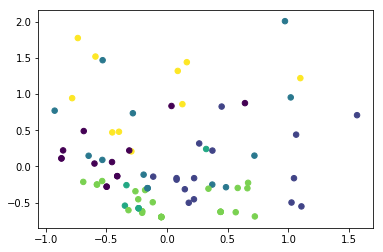

In [56]:
import numpy as np
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA

# km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(df6)

# Print the cluster centroids
print(km.cluster_centroids_)

# df_dummy = pd.get_dummies(df6)
# df_dummy
#transform into numpy array
x = df6.reset_index().values

km = kmodes.KModes(n_clusters=6, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(x)
df6['clusters'] = clusters



pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df6.ix[:,1:20])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df6["clusters"], s=30)
plt.show()

In [44]:
df6.to_csv('cluster_oder_group.csv', encoding='utf-8', index=False)

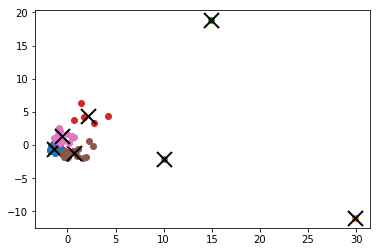

In [82]:
def kmeansshow(k,X):

    from sklearn import cluster
    from matplotlib import pyplot
    import numpy as np

    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    #print centroids


    for i in range(k):
        # select only data observations with cluster label == i
        ds = X[np.where(labels==i)]
        # plot the data observations
#         plt.scatter(ds[:,0],ds[:,1], c=df7["clusters"], s=20)
        pyplot.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
        # make the centroid x's bigger
        pyplot.setp(lines,ms=15.0)
        pyplot.setp(lines,mew=2.0)
    pyplot.show()
    return labels


pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df7.ix[:,1:20])

# Plot based on the two dimensions, and shade by cluster label
# plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df6["clusters"], s=30)
# plt.show()


label = kmeansshow(7,plot_columns)


In [83]:
se = pd.Series(label)

df7['clusters'] = se.values

sort = df7.sort_values('clusters')
sort.to_csv('order_cate_count3.csv', encoding='utf-8', index=False)

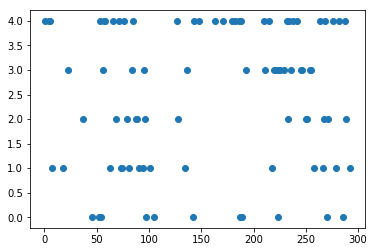

In [40]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

plt.scatter(df6['user_id'],df6['clusters'])
plt.show()

In [46]:
sort = df6.sort_values('clusters')
sort.to_csv('cluster_order_group.csv', encoding='utf-8', index=False)

In [84]:
df8 = pd.read_csv('session_csv.csv') # reads the csv and creates the dataframe called movie
df8.head()

,id,action,value,created_at,user_id
0,1144,enter,home,2018-02-21 08:30:45.169158+00,52
1,1148,enter,home,2018-02-21 10:07:01.98235+00,52
2,1152,เพิ่มเข้าตะกร้า,แกงส้ม+ไข่เจียว,2018-02-21 10:10:14.041527+00,52
3,1160,สั่งอาหาร,76,2018-02-21 10:15:29.73492+00,52
4,411,enter,home,2018-02-16 10:25:31.747361+00,18


In [113]:
df8['value'].value_counts()

home                                                  1434
โรงอาหารโต้รุ่ง                                        818
โต้รุ่ง checkout                                       349
อาหารไทย                                               246
โต้รุ่ง,สลัด checkout                                  181
2,พินิจโต้รุ่ง                                         111
เครื่องดื่ม                                            106
SteakHolder                                             94
พินิจโต้รุ่ง                                            93
5,ร้าน 3 ป. ขาหมู อาหารตามสั่ง                          87
ร้าน 3 ป. ขาหมู อาหารตามสั่ง                            82
ตำยำย่าง อาหารอีสาน ลาบยโส                              66
24,SteakHolder                                          66
ANWAR BURGER                                            64
ร้านอาหารตามสั่งอิ่มอร่อย                               64
3,ร้านอาหารตามสั่งอิ่มอร่อย                             59
12,ตำยำย่าง อาหารอีสาน ลาบยโส                           

In [100]:
df9=df8.loc[df8['action'] == 'enter_store']
df9 = df9[['value', 'user_id']].copy()

In [105]:
df10 = pd.get_dummies(df9, columns=['value'])

In [125]:
for k,i in df10.iterrows():
    if i['value_10,ผัดไท หอยทอด ราดหน้า']==i['value_10,ผัดไท หอยทอด ราดหน้า'] :
        
        if i['value_10,ผัดไท หอยทอด ราดหน้า'] == 1 or i['value_ผัดไท หอยทอด ลาดหน้า'] == 1:
            df10.loc[k,"ผัดไท หอยทอด ราดหน้าc"]= 1.0
        else :
            df10.loc[k,"ผัดไท หอยทอด ราดหน้าc"]= 0.0
            
    if i['value_11,ศิริรัตน์ โจ้ก ข้าวต้ม']==i['value_11,ศิริรัตน์ โจ้ก ข้าวต้ม'] :
        if i['value_11,ศิริรัตน์ โจ้ก ข้าวต้ม'] == 1 or i['value_ศิริรัตน์ โจ้ก ข้าวต้ม'] == 1:
            df10.loc[k,"value_11,ศิริรัตน์ โจ้ก ข้าวต้มc"]= 1.0
        else :
             df10.loc[k,"value_11,ศิริรัตน์ โจ้ก ข้าวต้มc"]= 0.0
                
    if i['value_12,ตำยำย่าง อาหารอีสาน ลาบยโส']==i['value_12,ตำยำย่าง อาหารอีสาน ลาบยโส'] :
        
        if i['value_12,ตำยำย่าง อาหารอีสาน ลาบยโส'] == 1 or i['value_ตำยำย่าง อาหารอีสาน ลาบยโส'] == 1:
            df10.loc[k,"value_12,ตำยำย่าง อาหารอีสาน ลาบยโสc"]= 1.0
        else :
            df10.loc[k,"value_12,ตำยำย่าง อาหารอีสาน ลาบยโสc"]= 0.0
            
    if i['value_13,ข้าวแกงชุดอิ่มอร่อย']==i['value_13,ข้าวแกงชุดอิ่มอร่อย'] :
        
        if i['value_13,ข้าวแกงชุดอิ่มอร่อย'] == 1 or i['value_ข้าวแกงชุดอิ่มอร่อย'] == 1:
            df10.loc[k,"value_13,ข้าวแกงชุดอิ่มอร่อยc"]= 1.0
        else :
            df10.loc[k,"value_13,ข้าวแกงชุดอิ่มอร่อยc"]= 0.0
            
    if i['value_14,เครื่องดื่ม ยำผลไม้ ผลไม้']==i['value_14,เครื่องดื่ม ยำผลไม้ ผลไม้'] :
        
        if i['value_14,เครื่องดื่ม ยำผลไม้ ผลไม้'] == 1 or i['value_เครื่องดื่ม ยำผลไม้ ผลไม้'] == 1:
            df10.loc[k,"value_14,เครื่องดื่ม ยำผลไม้ ผลไม้c"]= 1.0
        else :
            df10.loc[k,"value_14,เครื่องดื่ม ยำผลไม้ ผลไม้c"]= 0.0
    if i['value_15,ปังเย็น']==i['value_15,ปังเย็น'] :
        
        if i['value_15,ปังเย็น'] == 1 or i['value_ปังเย็น'] == 1:
            df10.loc[k,"value_15,ปังเย็นc"]= 1.0
        else :
            df10.loc[k,"value_15,ปังเย็นc"]= 0.0
            
    if i['value_13,ข้าวแกงชุดอิ่มอร่อย']==i['value_13,ข้าวแกงชุดอิ่มอร่อย'] :
        
        if i['value_13,ข้าวแกงชุดอิ่มอร่อย'] == 1 or i['value_ข้าวแกงชุดอิ่มอร่อย'] == 1:
            df10.loc[k,"value_13,ข้าวแกงชุดอิ่มอร่อยc"]= 1.0
        else :
            df10.loc[k,"value_13,ข้าวแกงชุดอิ่มอร่อยc"]= 0.0
    if i['value_16,น้องแนนหมูปิ้ง']==i['value_16,น้องแนนหมูปิ้ง'] :
        
        if i['value_16,น้องแนนหมูปิ้ง'] == 1 or i['value_น้องแนนหมูปิ้ง'] == 1:
            df10.loc[k,"value_16,น้องแนนหมูปิ้งc"]= 1.0
        else :
            df10.loc[k,"value_16,น้องแนนหมูปิ้งc"]= 0.0
    if i['value_17,สมใจ ลูกชิ้นทอด']==i['value_17,สมใจ ลูกชิ้นทอด'] :
        
        if i['value_17,สมใจ ลูกชิ้นทอด'] == 1 or i['value_สมใจ ลูกชิ้นทอด'] == 1:
            df10.loc[k,"value_17,สมใจ ลูกชิ้นทอดc"]= 1.0
        else :
            df10.loc[k,"value_17,สมใจ ลูกชิ้นทอดc"]= 0.0
    if i['value_18,ANWAR BURGER']==i['value_18,ANWAR BURGER'] :
        
        if i['value_18,ANWAR BURGER'] == 1 or i['value_ANWAR BURGER'] == 1:
            df10.loc[k,"value_18,ANWAR BURGERc"]= 1.0
        else :
            df10.loc[k,"value_18,ANWAR BURGERc"]= 0.0
            
    if i['value_2,พินิจโต้รุ่ง']==i['value_2,พินิจโต้รุ่ง'] :
        
        if i['value_2,พินิจโต้รุ่ง'] == 1 or i['value_พินิจโต้รุ่ง'] == 1:
            df10.loc[k,"value_2,พินิจโต้รุ่งc"]= 1.0
        else :
            df10.loc[k,"value_2,พินิจโต้รุ่งc"]= 0.0
            
    if i['value_24,SteakHolder']==i['value_24,SteakHolder'] :
        
        if i['value_24,SteakHolder'] == 1 or i['value_SteakHolder'] == 1:
            df10.loc[k,"value_24,SteakHolderc"]= 1.0
        else :
            df10.loc[k,"value_24,SteakHolderc"]= 0.0
            
#     if i['value_25,Salad In The Box']==i['value_25,Salad In The Box'] :
#         df10.loc[k,"value_25,Salad In The Boxc"]= df10[i['value_25,Salad In The Box']]
 
        
    if i['value_3,ร้านอาหารตามสั่งอิ่มอร่อย']==i['value_3,ร้านอาหารตามสั่งอิ่มอร่อย'] :
        
        if i['value_3,ร้านอาหารตามสั่งอิ่มอร่อย'] == 1 or i['value_ร้านอาหารตามสั่งอิ่มอร่อย'] == 1:
            df10.loc[k,"value_3,ร้านอาหารตามสั่งอิ่มอร่อยc"]= 1.0
        else :
            df10.loc[k,"value_3,ร้านอาหารตามสั่งอิ่มอร่อยc"]= 0.0
            
    if i['value_4,อาหารอิสลาม Halal Food']==i['value_4,อาหารอิสลาม Halal Food'] :
        
        if i['value_4,อาหารอิสลาม Halal Food'] == 1 or i['value_อาหารอิสลาม Halal Food'] == 1:
            df10.loc[k,"value_4,อาหารอิสลาม Halal Foodc"]= 1.0
        else :
            df10.loc[k,"value_4,อาหารอิสลาม Halal Foodc"]= 0.0
            
    if i['value_5,ร้าน 3 ป. ขาหมู อาหารตามสั่ง']==i['value_5,ร้าน 3 ป. ขาหมู อาหารตามสั่ง'] :
        
        if i['value_5,ร้าน 3 ป. ขาหมู อาหารตามสั่ง'] == 1 or i['value_ร้าน 3 ป. ขาหมู อาหารตามสั่ง'] == 1:
            df10.loc[k,"value_5,ร้าน 3 ป. ขาหมู อาหารตามสั่งc"]= 1.0
        else :
            df10.loc[k,"value_5,ร้าน 3 ป. ขาหมู อาหารตามสั่งc"]= 0.0
            
    if i['value_6,ชาย 4 บะหมี่เกี๊ยว']==i['value_6,ชาย 4 บะหมี่เกี๊ยว'] :
        
        if i['value_6,ชาย 4 บะหมี่เกี๊ยว'] == 1 or i['value_ชาย 4 บะหมี่เกี๊ยว'] == 1:
            df10.loc[k,"value_6,ชาย 4 บะหมี่เกี๊ยวc"]= 1.0
        else :
            df10.loc[k,"value_6,ชาย 4 บะหมี่เกี๊ยวc"]= 0.0
            
    if i['value_7,แชมป์ฮั้งเพ้ง']==i['value_7,แชมป์ฮั้งเพ้ง'] :
        
        if i['value_7,แชมป์ฮั้งเพ้ง'] == 1 or i['value_แชมป์ฮั้งเพ้ง'] == 1:
            df10.loc[k,"value_7,แชมป์ฮั้งเพ้งc"]= 1.0
        else :
            df10.loc[k,"value_7,แชมป์ฮั้งเพ้งc"]= 0.0
    if i['value_8,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี']==i['value_8,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี'] :
        
        if i['value_8,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี'] == 1 or i['value_ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี'] == 1:
            df10.loc[k,"value_8,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สีc"]= 1.0
        else :
            df10.loc[k,"value_8,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สีc"]= 0.0
    if i['value_9,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ']==i['value_9,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ'] :
        
        if i['value_9,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ'] == 1 or i['value_ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ'] == 1:
            df10.loc[k,"value_9,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบc"]= 1.0
        else :
            df10.loc[k,"value_9,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบc"]= 0.0

     


In [126]:
list(my_dataframe.columns.values)

,user_id,"value_10,ผัดไท หอยทอด ราดหน้า","value_11,ศิริรัตน์ โจ้ก ข้าวต้ม","value_12,ตำยำย่าง อาหารอีสาน ลาบยโส","value_13,ข้าวแกงชุดอิ่มอร่อย","value_14,เครื่องดื่ม ยำผลไม้ ผลไม้","value_15,ปังเย็น","value_16,น้องแนนหมูปิ้ง","value_17,สมใจ ลูกชิ้นทอด","value_18,ANWAR BURGER",...,"value_17,สมใจ ลูกชิ้นทอดc","value_18,ANWAR BURGERc","value_2,พินิจโต้รุ่งc","value_24,SteakHolderc","value_4,อาหารอิสลาม Halal Foodc","value_5,ร้าน 3 ป. ขาหมู อาหารตามสั่งc","value_6,ชาย 4 บะหมี่เกี๊ยวc","value_7,แชมป์ฮั้งเพ้งc","value_8,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สีc","value_9,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบc"
6,18,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,18,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,18,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,36,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,37,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,19,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34,17,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,17,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,17,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,17,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
list(df10.columns.values)

['user_id',
 'value_10,ผัดไท หอยทอด ราดหน้า',
 'value_11,ศิริรัตน์ โจ้ก ข้าวต้ม',
 'value_12,ตำยำย่าง อาหารอีสาน ลาบยโส',
 'value_13,ข้าวแกงชุดอิ่มอร่อย',
 'value_14,เครื่องดื่ม ยำผลไม้ ผลไม้',
 'value_15,ปังเย็น',
 'value_16,น้องแนนหมูปิ้ง',
 'value_17,สมใจ ลูกชิ้นทอด',
 'value_18,ANWAR BURGER',
 'value_2,พินิจโต้รุ่ง',
 'value_21',
 'value_24',
 'value_24,SteakHolder',
 'value_25,Salad In The Box',
 'value_26',
 'value_3,ร้านอาหารตามสั่งอิ่มอร่อย',
 'value_4,อาหารอิสลาม Halal Food',
 'value_5,ร้าน 3 ป. ขาหมู อาหารตามสั่ง',
 'value_6,ชาย 4 บะหมี่เกี๊ยว',
 'value_7,แชมป์ฮั้งเพ้ง',
 'value_8,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี',
 'value_9,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ',
 'value_ANWAR BURGER',
 'value_Steak Holder',
 'value_SteakHolder',
 'value_ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี',
 'value_ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ',
 'value_ข้าวแกงชุดอิ่มอร่อย',
 'value_ชาย 4 บะหมี่เกี๊ยว',
 'value_ตำยำย่าง อาหารอีสาน ลาบยโส',
 'value_น้องแนนหมูปิ้ง',
 'value_ปังเย็น',
 'value_ผัดไท หอยทอด ราดหน้า'

In [131]:
df11=df10.drop([ 'value_10,ผัดไท หอยทอด ราดหน้า',
 'value_11,ศิริรัตน์ โจ้ก ข้าวต้ม',
 'value_12,ตำยำย่าง อาหารอีสาน ลาบยโส',
 'value_13,ข้าวแกงชุดอิ่มอร่อย',
 'value_14,เครื่องดื่ม ยำผลไม้ ผลไม้',
 'value_15,ปังเย็น',
 'value_16,น้องแนนหมูปิ้ง',
 'value_17,สมใจ ลูกชิ้นทอด',
 'value_18,ANWAR BURGER',
 'value_2,พินิจโต้รุ่ง',
 'value_21',
 'value_24',
 'value_24,SteakHolder',
 'value_26',
 'value_3,ร้านอาหารตามสั่งอิ่มอร่อย',
 'value_4,อาหารอิสลาม Halal Food',
 'value_5,ร้าน 3 ป. ขาหมู อาหารตามสั่ง',
 'value_6,ชาย 4 บะหมี่เกี๊ยว',
 'value_7,แชมป์ฮั้งเพ้ง',
 'value_8,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี',
 'value_9,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ',
 'value_ANWAR BURGER',
 'value_Steak Holder',
 'value_SteakHolder',
 'value_ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี',
 'value_ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ',
 'value_ข้าวแกงชุดอิ่มอร่อย',
 'value_ชาย 4 บะหมี่เกี๊ยว',
 'value_ตำยำย่าง อาหารอีสาน ลาบยโส',
 'value_น้องแนนหมูปิ้ง',
 'value_ปังเย็น',
 'value_ผัดไท หอยทอด ราดหน้า',
 'value_ผัดไท หอยทอด ลาดหน้า',
 'value_พินิจโต้รุ่ง',
 'value_ร้าน 3 ป. ขาหมู อาหารตามสั่ง',
 'value_ร้านอาหารตามสั่งอิ่มอร่อย',
 'value_ศิริรัตน์ โจ้ก ข้าวต้ม',
 'value_สมใจ ลูกชิ้นทอด',
 'value_อาหารอิสลาม Halal Food',
 'value_เครื่องดื่ม ยำผลไม้ ผลไม',
 'value_เครื่องดื่ม ยำผลไม้ ผลไม้',
 'value_แชมป์ฮั้งเพ้ง',],1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 29, cost: 896.0
Run 1, iteration: 2/100, moves: 2, cost: 893.0
Run 1, iteration: 3/100, moves: 0, cost: 893.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 63, cost: 913.0
Run 2, iteration: 2/100, moves: 12, cost: 913.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 34, cost: 882.0
Run 3, iteration: 2/100, moves: 12, cost: 879.0
Run 3, iteration: 3/100, moves: 3, cost: 877.0
Run 3, iteration: 4/100, moves: 0, cost: 877.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 20, cost: 922.0
Run 4, iteration: 2/100, moves: 1, cost: 922.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 29, cost: 859.0
Run 5, iteration: 2/100, move

c:\users\admin\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


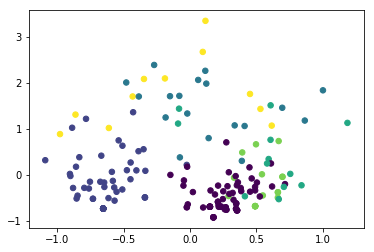

In [151]:

x = new_df1.reset_index().values

km = kmodes.KModes(n_clusters=6, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(x)
new_df1['clusters'] = clusters



pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(new_df1.ix[:,1:20])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=new_df1["clusters"], s=30)
plt.show()

In [138]:
sort = df11.sort_values('user_id')
sort.to_csv('cluster_enter.csv', encoding='utf-8', index=False)

In [140]:
df12 = pd.read_csv('cluster_enter.csv')

In [143]:
new_df = pd.DataFrame(columns = ['user_id','Salad In The Box','SteakHolder','ANWAR BURGER','สมใจ ลูกชิ้นทอด','น้องแนนหมูปิ้ง','ปังเย็น',
        'เครื่องดื่ม ยำผลไม้ ผลไม้','ข้าวแกงชุดอิ่มอร่อย','ตำยำย่าง อาหารอีสาน ลาบยโส','ศิริรัตน์ โจ้ก ข้าวต้ม','ผัดไท หอยทอด ราดหน้า','ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ',
        'ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี','แชมป์ฮั้งเพ้ง','ชาย 4 บะหมี่เกี๊ยว','ร้าน 3 ป. ขาหมู อาหารตามสั่ง','อาหารอิสลาม Halal Food','ร้านอาหารตามสั่งอิ่มอร่อย','พินิจโต้รุ่ง'])
for k,i in df12.iterrows():
    if any(new_df.user_id == i['user_id']) :

        index=new_df[new_df['user_id']== i['user_id']].index.item()
        
        
        if new_df.iloc[index]['Salad In The Box'] == 0  :
            new_df.set_value(index, 'Salad In The Box', i['value_25,Salad In The Box'])
        if new_df.iloc[index]['SteakHolder'] == 0 :
            new_df.set_value(index, 'SteakHolder',  i['value_24,SteakHolderc'])
        if new_df.iloc[index]['ANWAR BURGER'] == 0 :
            new_df.set_value(index, 'ANWAR BURGER',  i['value_18,ANWAR BURGERc'])
        if new_df.iloc[index]['สมใจ ลูกชิ้นทอด'] == 0 :
            new_df.set_value(index, 'สมใจ ลูกชิ้นทอด',  i['value_17,สมใจ ลูกชิ้นทอดc'])
        if  new_df.iloc[index]['น้องแนนหมูปิ้ง'] == 0 :
            new_df.set_value(index, 'น้องแนนหมูปิ้ง', i['value_16,น้องแนนหมูปิ้งc'])
        if  new_df.iloc[index]['ปังเย็น'] == 0 :
            new_df.set_value(index, 'ปังเย็น', i['value_15,ปังเย็นc'])
        if new_df.iloc[index]['เครื่องดื่ม ยำผลไม้ ผลไม้'] == 0 :
            new_df.set_value(index, 'เครื่องดื่ม ยำผลไม้ ผลไม้',  i['value_14,เครื่องดื่ม ยำผลไม้ ผลไม้c'])
        if  new_df.iloc[index]['ข้าวแกงชุดอิ่มอร่อย'] == 0 :
            new_df.set_value(index, 'ข้าวแกงชุดอิ่มอร่อย', i['value_13,ข้าวแกงชุดอิ่มอร่อยc'])
        if new_df.iloc[index]['ตำยำย่าง อาหารอีสาน ลาบยโส'] == 0 :
            new_df.set_value(index, 'ตำยำย่าง อาหารอีสาน ลาบยโส',  i['value_12,ตำยำย่าง อาหารอีสาน ลาบยโสc'])
        if new_df.iloc[index]['ศิริรัตน์ โจ้ก ข้าวต้ม'] == 0 :
            new_df.set_value(index, 'ศิริรัตน์ โจ้ก ข้าวต้ม',  i['value_11,ศิริรัตน์ โจ้ก ข้าวต้มc'])
        if new_df.iloc[index]['ผัดไท หอยทอด ราดหน้า'] == 0 :
            new_df.set_value(index, 'ผัดไท หอยทอด ราดหน้า',  i['ผัดไท หอยทอด ราดหน้าc'])
        if new_df.iloc[index]['ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ'] == 0 :
            new_df.set_value(index, 'ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ',  i['value_9,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบc'])
        if new_df.iloc[index]['ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี'] == 0 :
            new_df.set_value(index, 'ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี',  i['value_8,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สีc'])
        if new_df.iloc[index]['แชมป์ฮั้งเพ้ง'] == 0 :
            new_df.set_value(index, 'แชมป์ฮั้งเพ้ง',i['value_7,แชมป์ฮั้งเพ้งc'])
        if new_df.iloc[index]['ชาย 4 บะหมี่เกี๊ยว'] == 0 :
            new_df.set_value(index, 'ชาย 4 บะหมี่เกี๊ยว',  i['value_6,ชาย 4 บะหมี่เกี๊ยวc'])
        if new_df.iloc[index]['ร้าน 3 ป. ขาหมู อาหารตามสั่ง'] == 0 :

            new_df.set_value(index, 'ร้าน 3 ป. ขาหมู อาหารตามสั่ง',  i['value_5,ร้าน 3 ป. ขาหมู อาหารตามสั่งc'])
        if  new_df.iloc[index]['อาหารอิสลาม Halal Food'] == 0 :
            new_df.set_value(index, 'อาหารอิสลาม Halal Food', i['value_4,อาหารอิสลาม Halal Foodc'])
        if  new_df.iloc[index]['ร้านอาหารตามสั่งอิ่มอร่อย'] == 0:

            new_df.set_value(index, 'ร้านอาหารตามสั่งอิ่มอร่อย', i['value_3,ร้านอาหารตามสั่งอิ่มอร่อยc'])
        if new_df.iloc[index]['พินิจโต้รุ่ง'] == 0 :
            new_df.set_value(index, 'พินิจโต้รุ่ง',  i['value_2,พินิจโต้รุ่งc'])


    else :
        new_df.loc[len(new_df)] = [i['user_id'],i['value_25,Salad In The Box'],i['value_24,SteakHolderc'],i['value_18,ANWAR BURGERc'],i['value_17,สมใจ ลูกชิ้นทอดc'],i['value_16,น้องแนนหมูปิ้งc'],i['value_15,ปังเย็นc'],i['value_14,เครื่องดื่ม ยำผลไม้ ผลไม้c']
                                       ,i['value_13,ข้าวแกงชุดอิ่มอร่อยc'],i['value_12,ตำยำย่าง อาหารอีสาน ลาบยโสc'],i['value_11,ศิริรัตน์ โจ้ก ข้าวต้มc'],i['ผัดไท หอยทอด ราดหน้าc'],i['value_9,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบc'],i['value_8,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สีc']
                                       ,i['value_7,แชมป์ฮั้งเพ้งc'],i['value_6,ชาย 4 บะหมี่เกี๊ยวc'],i['value_5,ร้าน 3 ป. ขาหมู อาหารตามสั่งc'],i['value_4,อาหารอิสลาม Halal Foodc'],i['value_3,ร้านอาหารตามสั่งอิ่มอร่อยc'],i['value_2,พินิจโต้รุ่งc']]


c:\users\admin\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
c:\users\admin\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
c:\users\admin\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
c:\users\admin\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors

In [145]:
new_df1 = new_df.replace(np.nan, 1, regex=True)

In [146]:
new_df1

,user_id,Salad In The Box,SteakHolder,ANWAR BURGER,สมใจ ลูกชิ้นทอด,น้องแนนหมูปิ้ง,ปังเย็น,เครื่องดื่ม ยำผลไม้ ผลไม้,ข้าวแกงชุดอิ่มอร่อย,ตำยำย่าง อาหารอีสาน ลาบยโส,ศิริรัตน์ โจ้ก ข้าวต้ม,ผัดไท หอยทอด ราดหน้า,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี,แชมป์ฮั้งเพ้ง,ชาย 4 บะหมี่เกี๊ยว,ร้าน 3 ป. ขาหมู อาหารตามสั่ง,อาหารอิสลาม Halal Food,ร้านอาหารตามสั่งอิ่มอร่อย,พินิจโต้รุ่ง
0,17.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,18.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
2,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,21.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,23.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
